In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from skimage import io
import os
import glob

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
car1 = io.imread('C:\\datasets\\CarData\\TrainImages\\neg-0.pgm')
print car1.shape

(40L, 100L)


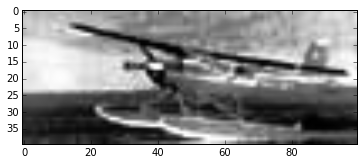

In [3]:
plt.imshow(car1, cmap=plt.cm.binary)

In [4]:
import PIL
from PIL import Image

In [5]:
img = Image.open('C:\\datasets\\CarData\\TrainImages\\neg-0.pgm')
print img.size

(100, 40)


In [6]:
img = img.resize((150,50), PIL.Image.ANTIALIAS)
img.size

(150, 50)

In [8]:
img.save('C:\\datasets\\CarData\\TrainImages\\neg-0-rs.pgm')

In [10]:
car1_rs = io.imread('C:\\datasets\\CarData\\TrainImages\\neg-0-rs.pgm')
print car1_rs.shape

(50L, 150L)


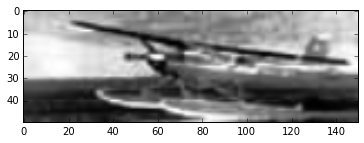

In [11]:
plt.imshow(car1_rs, cmap=plt.cm.binary)

(200, 100)
(100L, 200L, 3L)
[187 150  37 ...,  59  69  83]
(60000L,)
[[187 150  37]
 [186 150  50]
 [187 152  70]
 [187 154  83]
 [188 157  94]
 [188 163 107]
 [189 170 126]
 [192 175 139]
 [196 181 151]
 [198 182 151]]
[[188 151  42]
 [188 153  61]
 [190 157  85]
 [190 160 100]
 [190 164 110]
 [190 168 121]
 [191 173 133]
 [193 176 138]
 [196 179 144]
 [197 179 142]]
[[189 153  50]
 [190 158  78]
 [193 165 104]
 [194 167 117]
 [194 170 125]
 [193 173 133]
 [194 175 139]
 [195 176 136]
 [196 175 133]
 [196 175 129]]
250


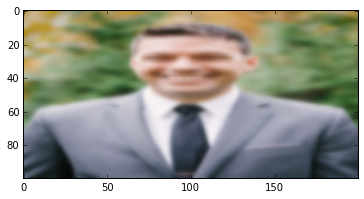

In [15]:
img2 = Image.open('C:\\datasets\\profile-pic.png')
img2 = img2.resize((200,100), PIL.Image.ANTIALIAS)

from PIL import ImageFilter
img2 = img2.filter(ImageFilter.GaussianBlur(radius=3))
print img2.size
arr = np.array(img2)
print arr.shape
print arr.flatten()
print arr.flatten().shape

print arr[:10,0]
print arr[:10,1]
print arr[:10,2]

plt.imshow(arr, cmap=plt.cm.binary)
print arr.max()

In [16]:
def process_image(image, blocks=4.0):
    '''Given a PIL Image object it returns its feature vector.

    Args:
      image (PIL.Image): image to process.
      blocks (int, optional): number of block to subdivide the RGB space into.

    Returns:
      list of float: feature vector if successful. None if the image is not
      RGB.
    '''
    if not image.mode == 'RGB':
        return None
    feature = [0] * blocks * blocks * blocks
    pixel_count = 0
    for pixel in image.getdata():
        ridx = int(pixel[0]/(256/blocks))
        gidx = int(pixel[1]/(256/blocks))
        bidx = int(pixel[2]/(256/blocks))
        idx = ridx + gidx * blocks + bidx * blocks * blocks
        feature[idx] += 1
        pixel_count += 1
    return [x/float(pixel_count) for x in feature]

[23174, 1361, 26, 2, 8697, 14105, 3173, 92, 0, 61, 2781, 552, 0, 0, 0, 0, 5815, 38, 0, 0, 9828, 44225, 7257, 181, 0, 28465, 37886, 10314, 0, 0, 0, 6, 0, 0, 0, 0, 0, 14875, 159, 2, 0, 3621, 69589, 16666, 0, 0, 175, 4314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10885, 519, 0, 0, 188, 35192]
354224
[0.06542187994037671, 0.003842201544785221, 7.33998825601879e-05, 5.6461448123221465e-06, 0.024552260716382855, 0.03981943628890194, 0.008957608744749086, 0.0002597226613668187, 0.0, 0.00017220741677582545, 0.007850964361533945, 0.0015583359682009123, 0.0, 0.0, 0.0, 0.0, 0.016416166041826642, 0.00010727675143412079, 0.0, 0.0, 0.027745155607751027, 0.12485037716247346, 0.02048703645151091, 0.0005109761055151542, 0.0, 0.08035875604137495, 0.10695492117981842, 0.02911716879714531, 0.0, 0.0, 0.0, 1.693843443696644e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041993202041645965, 0.00044886851257961065, 5.6461448123221465e-06, 0.0, 0.010222345182709246, 0.19645478567234292, 0.04704932472108045, 0.0, 0.0, 0.0004940376710781

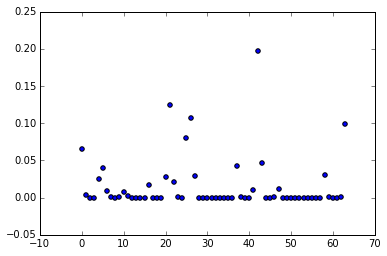

In [46]:
img2 = Image.open('C:\\datasets\\profile-pic.png')

blocks = 4
feature = [0] * blocks * blocks * blocks
pixel_count = 0
for pixel in img2.getdata():
    ridx = int(pixel[0]/(256/blocks))
    gidx = int(pixel[1]/(256/blocks))
    bidx = int(pixel[2]/(256/blocks))
    idx = ridx + gidx * blocks + bidx * blocks * blocks
    feature[idx] += 1
    pixel_count += 1
    
print feature
print pixel_count
norm = [x/float(pixel_count) for x in feature]
print norm

plt.scatter([i for i in range(64)], norm)
plt.show()

In [47]:
path = 'test_images_originals\\*.pgm'

def writeOutput(outFile, img):
    
    arr = np.array(img).flatten()
    output = ' '.join(map(str, arr))
    with open(outFile, 'a') as f:
        f.write(output + "\n")

for fn in glob.glob(path):
        raw_img = Image.open(fn).resize((200,100), PIL.Image.ANTIALIAS)
        gs_img = raw_img.convert("L")
        raw_blur = raw_img.filter(ImageFilter.GaussianBlur(radius=2))
        gs_blur = gs_img.filter(ImageFilter.GaussianBlur(radius=2))
        
        writeOutput('output_raw.txt', raw_img)
        writeOutput('output_gs.txt', gs_img)
        writeOutput('output_raw_blur.txt', raw_blur)
        writeOutput('output_gs_blur.txt', gs_blur)
        